# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Cargamos el conjunto
df_csv = pd.read_csv('mobile_phones.csv')
df_csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df_csv = pd.read_csv('mobile_phones.csv')
df_csv['price_range'] = df_csv['price_range'].astype('category')
df_csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df_csv.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

In [6]:
df_csv.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Indicamos que la variable es categórica
dic_target = { 0 : 'low cost', 1: 'medium cost', 2: 'high cost', 3 : 'very high cost'}
df_csv = df_csv.sort_values(by='price_range')
df_csv['price_range'] = df_csv['price_range'].map(dic_target)

In [8]:
df_csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,366,1234,1086,14,7,3,1,1,0,low cost
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,119,529,1082,15,5,10,1,0,1,low cost
419,914,1,0.9,0,2,0,4,0.8,100,2,...,191,1495,808,11,7,5,1,1,0,low cost
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,172,812,776,7,6,8,0,0,0,low cost
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,713,1513,286,14,4,17,1,0,1,low cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,259,1040,3863,17,12,9,1,1,1,very high cost
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,236,1960,3506,14,5,12,1,1,0,very high cost
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,650,864,3984,17,14,8,1,1,1,very high cost
956,862,0,2.3,0,9,1,6,0.1,107,8,...,829,1977,3458,9,4,9,1,1,1,very high cost


In [9]:
df_csv.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [10]:
df_csv['price_range'].value_counts()

low cost          500
medium cost       500
high cost         500
very high cost    500
Name: price_range, dtype: int64

In [11]:
df_csv['price_range'].value_counts() / df_csv['price_range'].count() * 100

low cost          25.0
medium cost       25.0
high cost         25.0
very high cost    25.0
Name: price_range, dtype: float64

In [12]:
# Vamos a ver la correlación de variables teniendo en cuenta el fichero original, sin variables categóricas como tal para poder
# verlo más sencillo en los diagramas de dispersión
dff = pd.read_csv('mobile_phones.csv')
dff.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:xlabel='clock_speed', ylabel='price_range'>

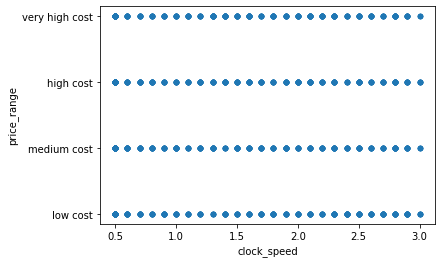

In [13]:
# Vamos a calcular los diagramas de dispersion entre dos variables
df_csv.plot.scatter(x="clock_speed", y="price_range")

<AxesSubplot:xlabel='ram', ylabel='price_range'>

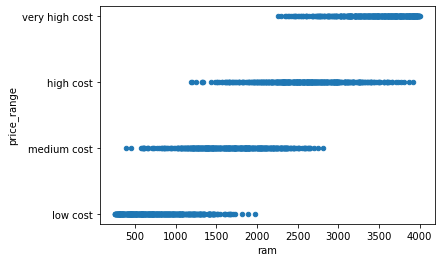

In [14]:
df_csv.plot.scatter(x="ram", y="price_range")

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

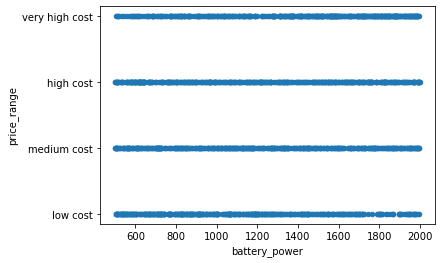

In [15]:
df_csv.plot.scatter(x="battery_power", y="price_range")

<AxesSubplot:xlabel='int_memory', ylabel='price_range'>

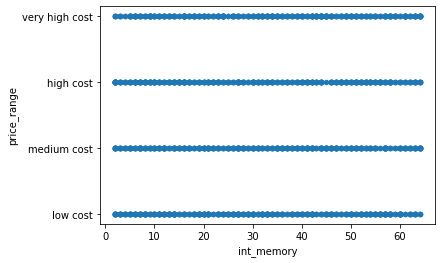

In [16]:
df_csv.plot.scatter(x="int_memory", y="price_range")

<AxesSubplot:xlabel='m_dep', ylabel='price_range'>

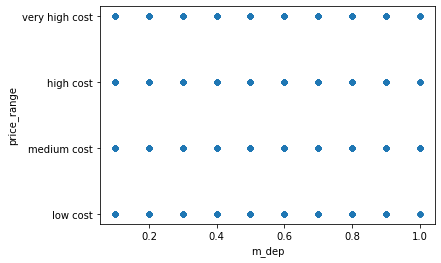

In [17]:
df_csv.plot.scatter(x="m_dep", y="price_range")

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

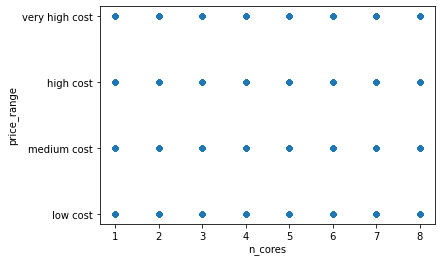

In [18]:
df_csv.plot.scatter(x="n_cores", y="price_range")

<AxesSubplot:xlabel='pc', ylabel='price_range'>

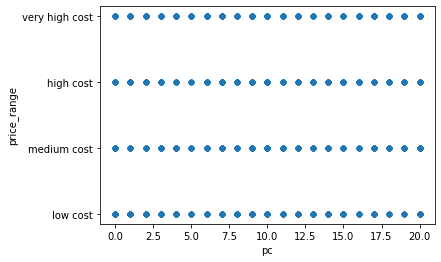

In [19]:
df_csv.plot.scatter(x="pc", y="price_range")

<AxesSubplot:xlabel='px_height', ylabel='price_range'>

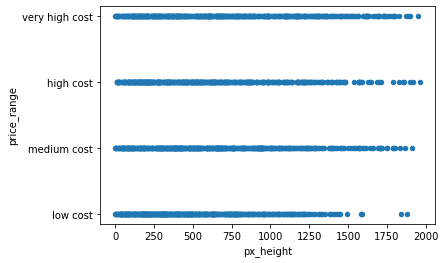

In [20]:
df_csv.plot.scatter(x="px_height", y="price_range")

<AxesSubplot:xlabel='sc_w', ylabel='price_range'>

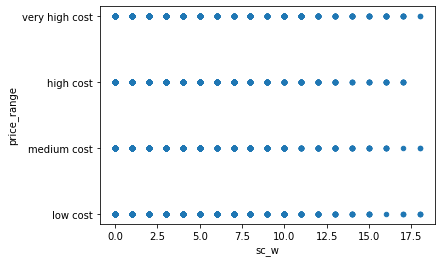

In [21]:
df_csv.plot.scatter(x="sc_w", y="price_range")

In [22]:
df_aux = df_csv.loc[:, ['battery_power', 'px_height', 'px_width', 'ram', 'price_range']]
df_aux

,battery_power,px_height,px_width,ram,price_range
1838,720,366,1234,1086,low cost
1762,808,119,529,1082,low cost
419,914,191,1495,808,low cost
846,1489,172,812,776,low cost
845,1907,713,1513,286,low cost
...,...,...,...,...,...
981,1046,259,1040,3863,very high cost
982,1035,236,1960,3506,very high cost
987,1688,650,864,3984,very high cost
956,862,829,1977,3458,very high cost


array([[<AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_height', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='battery_power', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_height'>,
        <AxesSubplot:xlabel='ram', ylabel='px_height'>],
       [<AxesSubplot:xlabel='battery_power', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>,
        <AxesSubplot:xlabel='ram', ylabel='px_width'>],
       [<AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>]], dtype=object)

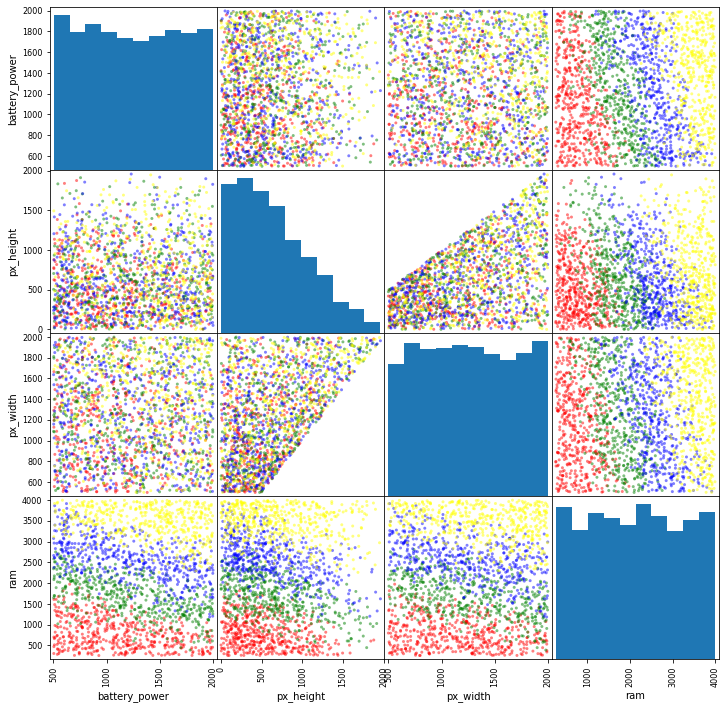

In [29]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'low cost' : 'red', 'medium cost' : 'green', 'high cost' : 'blue', 'very high cost' : 'yellow'}
colors = df_csv['price_range'].map(dic_colors)

pd.plotting.scatter_matrix(df_aux, figsize = (12, 12), diagonal = 'hist', color=colors)

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [30]:
RANDOM_STATE = 57

In [47]:
# Creamos un array que contenga sólo los datos de entrenamiento
aux = df_csv.values
arrDatos = np.delete(aux, 20, axis=1)

# Creamos otro array que sólo contenga la variable a predecir
df_aux2 = df_csv.iloc[:, 20:21]
arrClase = df_aux2.values

arrDatos, arrClase

(array([[720, 1, 0.9, ..., 1, 1, 0],
        [808, 1, 0.5, ..., 1, 0, 1],
        [914, 1, 0.9, ..., 1, 1, 0],
        ...,
        [1688, 0, 2.5, ..., 1, 1, 1],
        [862, 0, 2.3, ..., 1, 1, 1],
        [510, 1, 2.0, ..., 1, 1, 1]], dtype=object),
 array([['low cost'],
        ['low cost'],
        ['low cost'],
        ...,
        ['very high cost'],
        ['very high cost'],
        ['very high cost']], dtype=object))

In [56]:
# Vamos a empezar probando con min_samples_split = 20
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=20,random_state=RANDOM_STATE)

# Validación cruzada en 10 partes
scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8170000000000002, 0.7785)

In [79]:
train_acc = []
test_acc = []
for mss in range (5, 51, 5):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)
    
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))
    
train_acc, test_acc

([0.9753888888888887,
  0.9608333333333332,
  0.9480555555555557,
  0.9365,
  0.9251111111111111,
  0.9158888888888889,
  0.9093333333333332,
  0.9030555555555555,
  0.8965000000000002,
  0.8926111111111112],
 [0.8539999999999999,
  0.8535,
  0.85,
  0.853,
  0.8470000000000001,
  0.8425,
  0.8390000000000001,
  0.834,
  0.8305,
  0.8285])

In [66]:
train_acc = []
test_acc = []
for mss in range (5, 51, 5):
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)
    
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))
    
train_acc, test_acc

([0.9896666666666667,
  0.968888888888889,
  0.9512777777777777,
  0.9379444444444445,
  0.9258888888888889,
  0.9165000000000001,
  0.9095000000000001,
  0.9030555555555555,
  0.8965000000000002,
  0.8926111111111112],
 [0.851,
  0.8550000000000001,
  0.8504999999999999,
  0.85,
  0.8465,
  0.8435,
  0.8390000000000001,
  0.834,
  0.8305,
  0.8285])

In [68]:
train_acc = []
test_acc = []
for mss in range (5, 51, 5):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)
    
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))
    
train_acc, test_acc

([0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8170000000000002,
  0.8150000000000001,
  0.8142777777777777],
 [0.7785,
  0.7785,
  0.7785,
  0.7785,
  0.7775000000000001,
  0.7775000000000001,
  0.7775000000000001,
  0.7775000000000001,
  0.7755000000000001,
  0.7750000000000001])

In [89]:
train_acc = []
test_acc = []
for mss in range (2, 9):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)
    
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))
    
train_acc, test_acc

([0.9801666666666667,
  0.9790000000000001,
  0.9772777777777778,
  0.9753888888888887,
  0.9719999999999999,
  0.9697222222222223,
  0.9671666666666667],
 [0.851,
  0.8525,
  0.8554999999999999,
  0.8539999999999999,
  0.8539999999999999,
  0.8535,
  0.8564999999999999])

In [74]:
import matplotlib.pyplot as plt

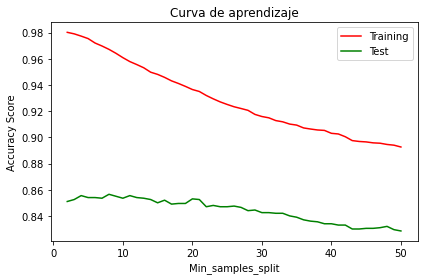

In [81]:
train_acc = []
test_acc = []
for mss in range (2, 51):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, arrDatos, arrClase, scoring='accuracy', cv=10, return_train_score=True)
    
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))

# Draw lines
plt.plot(range(2,51), train_acc, color="r",  label="Training")
plt.plot(range(2,51), test_acc, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Min_samples_split"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

In [90]:
from sklearn.tree import plot_tree

In [100]:
l = ["low cost", "medium cost", "high cost", "very high cost"]
arr = np.array(l)
arr

array(['low cost', 'medium cost', 'high cost', 'very high cost'],
      dtype='<U14')

In [101]:
df_aux1 = df_csv.iloc[:, 0:20]

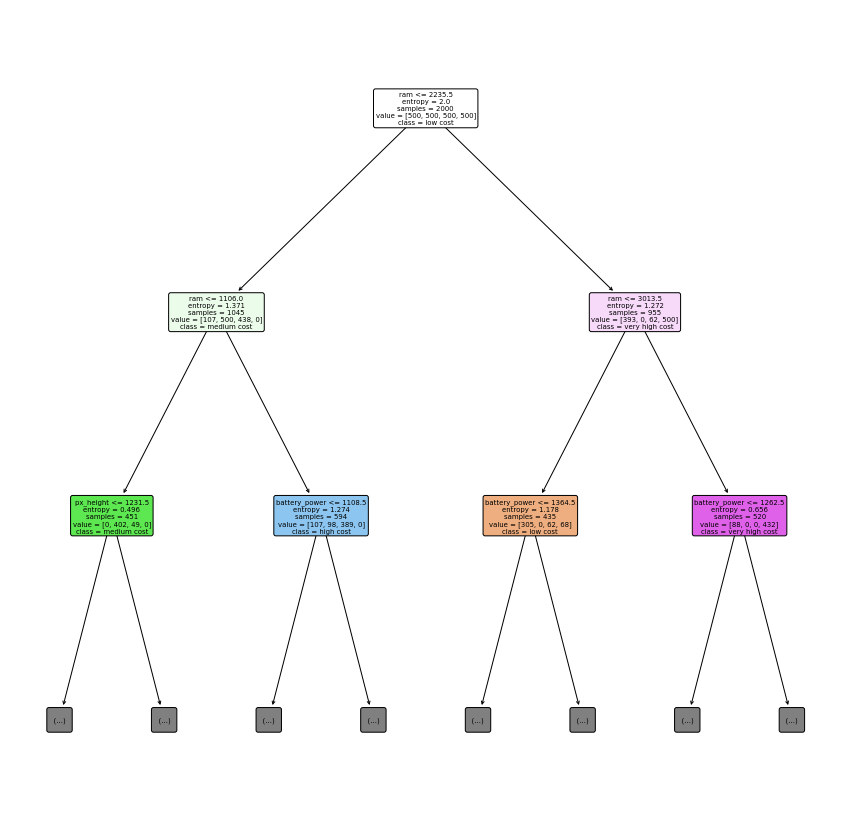

In [57]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=8, random_state=RANDOM_STATE)
clf = clf.fit(arrDatos, arrClase)
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, max_depth=2, filled=True, feature_names=list(df_aux1.columns), class_names=arr, rounded=True)
plt.show()

In [ ]:
from matplotlib import pyplot as plt

Feature: 0, Score: 0.11560
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00337
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00114
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00680
Feature: 7, Score: 0.00288
Feature: 8, Score: 0.01092
Feature: 9, Score: 0.00231
Feature: 10, Score: 0.00487
Feature: 11, Score: 0.06373
Feature: 12, Score: 0.08283
Feature: 13, Score: 0.69883
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00554
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00117


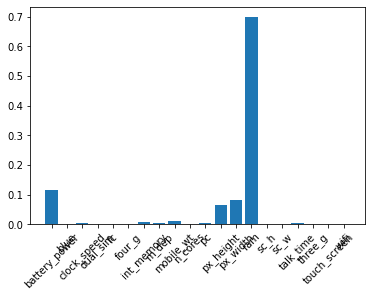

In [107]:
importance = clf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feature_names=list(df_aux.columns)
plt.bar([x for x in range(len(importance))], importance, tick_label = feature_names)
plt.xticks(rotation = 45) 
plt.show()

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [51]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=8, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, arrDatos, arrClase, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8592467712414027
Exhaustividad ponderada media:  0.8564999999999999
F1 ponderado media:  0.8566332321053485


In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=8, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, arrDatos, arrClase, cv=10)

# Informe por clases
cr = classification_report(arrClase,predictions, target_names=arr)
print(cr)

                precision    recall  f1-score   support

      low cost       0.79      0.82      0.81       500
   medium cost       0.91      0.91      0.91       500
     high cost       0.83      0.83      0.83       500
very high cost       0.90      0.86      0.88       500

      accuracy                           0.86      2000
     macro avg       0.86      0.86      0.86      2000
  weighted avg       0.86      0.86      0.86      2000



In [54]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[411   0  43  46]
 [  0 457  43   0]
 [ 39  46 415   0]
 [ 70   0   0 430]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

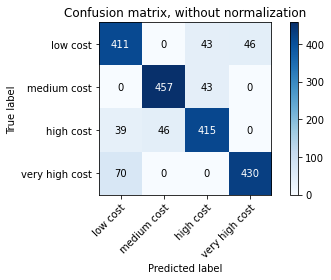

In [55]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(arrClase, predictions, arr, normalize=False)

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
